In [1]:
# Import libraries and set desired options
import pickle
from pathlib2 import Path
import numpy as np
import pandas as pd
from datetime import datetime
import os

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Read the training and test data sets, change paths if needed
PATH_TO_DATA = Path('data/')

times = ['time%s' % i for i in range(1, 11)]
sites = ['site%s' % i for i in range(1, 11)]
train_df = pd.read_csv(PATH_TO_DATA / 'train_sessions.csv',
                       index_col='session_id', parse_dates=times)
test_df = pd.read_csv(PATH_TO_DATA / 'test_sessions.csv',
                      index_col='session_id', parse_dates=times)

# Sort the data by time
train_df = train_df.sort_values(by='time1')

In [3]:
# Take a look at the train DataFrame head
train_df.head()

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
session_id,,,,,,,,,,,,,,,,,,,,,
21669,56,2013-01-12 08:05:57,55.0,2013-01-12 08:05:57,NaN,NaT,NaN,NaT,NaN,NaT,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0
54843,56,2013-01-12 08:37:23,55.0,2013-01-12 08:37:23,56.0,2013-01-12 09:07:07,55.0,2013-01-12 09:07:09,NaN,NaT,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0
77292,946,2013-01-12 08:50:13,946.0,2013-01-12 08:50:14,951.0,2013-01-12 08:50:15,946.0,2013-01-12 08:50:15,946.0,2013-01-12 08:50:16,...,2013-01-12 08:50:16,948.0,2013-01-12 08:50:16,784.0,2013-01-12 08:50:16,949.0,2013-01-12 08:50:17,946.0,2013-01-12 08:50:17,0
114021,945,2013-01-12 08:50:17,948.0,2013-01-12 08:50:17,949.0,2013-01-12 08:50:18,948.0,2013-01-12 08:50:18,945.0,2013-01-12 08:50:18,...,2013-01-12 08:50:18,947.0,2013-01-12 08:50:19,945.0,2013-01-12 08:50:19,946.0,2013-01-12 08:50:19,946.0,2013-01-12 08:50:20,0
146670,947,2013-01-12 08:50:20,950.0,2013-01-12 08:50:20,948.0,2013-01-12 08:50:20,947.0,2013-01-12 08:50:21,950.0,2013-01-12 08:50:21,...,2013-01-12 08:50:21,946.0,2013-01-12 08:50:21,951.0,2013-01-12 08:50:22,946.0,2013-01-12 08:50:22,947.0,2013-01-12 08:50:22,0


In [4]:
print('Number of sessions in the train data set is {}'.format(train_df.shape[0]))

Number of sessions in the train data set is 253561


In [5]:
# Replace site ids with site names
site_dic = pickle.load(open(PATH_TO_DATA / 'site_dic.pkl','rb'))

# Make swap ids with values: make site ids dict keys
site_dic = {val: key for val, key in zip(site_dic.values(), site_dic.keys())}

# Replace site ids with domain names for both train and test
train_df[sites] = train_df[sites].applymap(lambda x: site_dic[x] if x in site_dic else x)
test_df[sites] = test_df[sites].applymap(lambda x: site_dic[x] if x in site_dic else x)

In [6]:
# Let's take a look at the train dataset with site names instead of ids
train_df.head()

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
session_id,,,,,,,,,,,,,,,,,,,,,
21669,safebrowsing.clients.google.com,2013-01-12 08:05:57,safebrowsing-cache.google.com,2013-01-12 08:05:57,NaN,NaT,NaN,NaT,NaN,NaT,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0
54843,safebrowsing.clients.google.com,2013-01-12 08:37:23,safebrowsing-cache.google.com,2013-01-12 08:37:23,safebrowsing.clients.google.com,2013-01-12 09:07:07,safebrowsing-cache.google.com,2013-01-12 09:07:09,NaN,NaT,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0
77292,www.apache.org,2013-01-12 08:50:13,www.apache.org,2013-01-12 08:50:14,download.eclipse.org,2013-01-12 08:50:15,www.apache.org,2013-01-12 08:50:15,www.apache.org,2013-01-12 08:50:16,...,2013-01-12 08:50:16,download.oracle.com,2013-01-12 08:50:16,javadl-esd-secure.oracle.com,2013-01-12 08:50:16,www.caucho.com,2013-01-12 08:50:17,www.apache.org,2013-01-12 08:50:17,0
114021,www.webtide.com,2013-01-12 08:50:17,download.oracle.com,2013-01-12 08:50:17,www.caucho.com,2013-01-12 08:50:18,download.oracle.com,2013-01-12 08:50:18,www.webtide.com,2013-01-12 08:50:18,...,2013-01-12 08:50:18,public.dhe.ibm.com,2013-01-12 08:50:19,www.webtide.com,2013-01-12 08:50:19,www.apache.org,2013-01-12 08:50:19,www.apache.org,2013-01-12 08:50:20,0
146670,public.dhe.ibm.com,2013-01-12 08:50:20,jope.ow2.org,2013-01-12 08:50:20,download.oracle.com,2013-01-12 08:50:20,public.dhe.ibm.com,2013-01-12 08:50:21,jope.ow2.org,2013-01-12 08:50:21,...,2013-01-12 08:50:21,www.apache.org,2013-01-12 08:50:21,download.eclipse.org,2013-01-12 08:50:22,www.apache.org,2013-01-12 08:50:22,public.dhe.ibm.com,2013-01-12 08:50:22,0


In [7]:
print('Number of unique websites is {}'.format(len(site_dic)))

Number of unique websites is 48371


# Prepare data for visual analysis

In [8]:
full_df = pd.concat([train_df.drop('target', axis=1), test_df])
y = train_df['target']

extra_feats = pd.DataFrame(index=full_df.index)

extra_feats['session_length'] = (full_df[times].max(axis=1) - full_df[times].min(axis=1))/np.timedelta64(1, 's')
extra_feats['start_hour'] = full_df[times].min(axis=1).apply(lambda x: (x.hour))
extra_feats['start_minute'] = full_df[times].min(axis=1).apply(lambda x: (x.minute))
extra_feats['session_std'] = ((full_df[times]-datetime(1970,1,1))/np.timedelta64(1, 's')).std(axis=1)
# Additional factors for logit
extra_feats['weekday'] = full_df[times].min(axis=1).apply(lambda x: x.weekday())
extra_feats['yearmonth'] = full_df[times].min(axis=1).apply(lambda x: x.year*12+x.month)

# Visual analysis

We already know we'll be using bag-of-words and TF-IDS on the site names. Let's see what kind of features and binnings might be useful for time features.

In [9]:
# Build extra factors

extra_feats = pd.DataFrame(index=full_df.index)

extra_feats['session_length'] = (full_df[times].max(axis=1) - full_df[times].min(axis=1))/np.timedelta64(1, 's')
extra_feats['start_hour'] = full_df[times].min(axis=1).apply(lambda x: (x.hour))
extra_feats['start_minute'] = full_df[times].min(axis=1).apply(lambda x: (x.minute))
extra_feats['session_std'] = ((full_df[times]-datetime(1970,1,1))/np.timedelta64(1, 's')).std(axis=1)
# Additional factors for logit
extra_feats['weekday'] = full_df[times].min(axis=1).apply(lambda x: x.weekday())
extra_feats['yearmonth'] = full_df[times].min(axis=1).apply(lambda x: x.year*12+x.month)

In [10]:
# Variables for visual analysis
logit_extra_all = extra_feats.copy().fillna(0)
idx_split = train_df.shape[0]

session_start_hour = logit_extra_all.iloc[:idx_split,:]['start_hour'].values
session_start_minute = logit_extra_all.iloc[:idx_split,:]['start_minute'].values
session_start_weekday = logit_extra_all.iloc[:idx_split,:]['weekday'].values
session_start_yearmonth = logit_extra_all.iloc[:idx_split,:]['yearmonth'].values
session_length = logit_extra_all.iloc[:idx_split,:]['session_length'].values
session_len_std = logit_extra_all.iloc[:idx_split,:]['session_std'].values

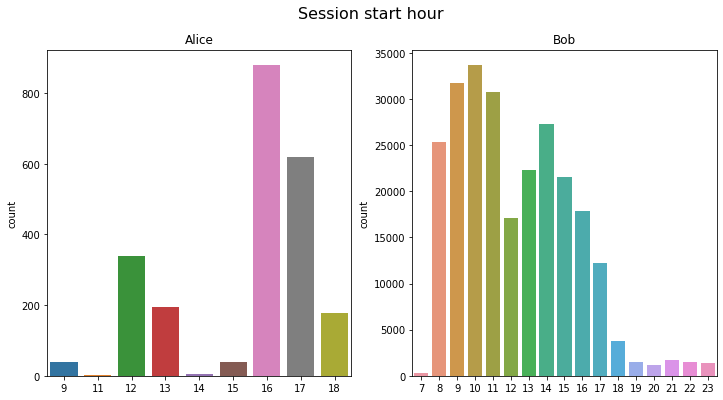

In [11]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
f.suptitle('Session start hour',fontsize=16)

sns.countplot(session_start_hour[y==1], ax=ax1).set_title('Alice')
sns.countplot(session_start_hour[y==0], ax=ax2).set_title('Bob')

plt.show()

# Conclusions for hour
Hour seems to be a really good predictor. From 19 to 8 Alice doesn't log on at all. Moreover, she mainly logs on between 16 and 18 hours, while Bobs logon counta are already declining.

Bins:
1. 16-17 - the most important bin
2. 12-13 - the other smaller peak
3. 18 - alice still logs on.
4. 9,11,14,15 - Alice barely logs on.
5. Everything else. The time interval where Alice doesn't log on at all.

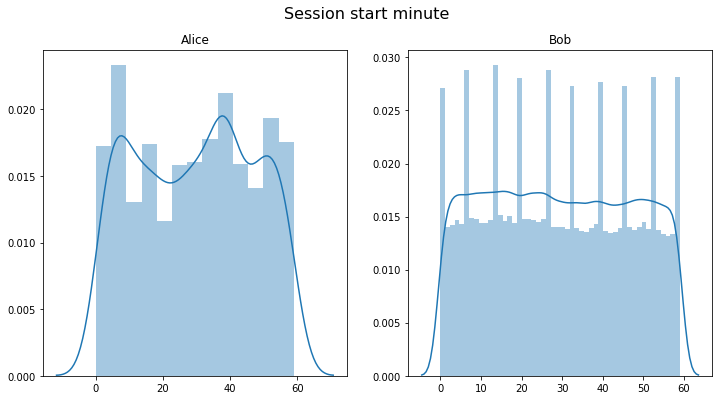

In [12]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
f.suptitle('Session start minute',fontsize=16)

sns.distplot(session_start_minute[y==1], ax=ax1).set_title('Alice')
sns.distplot(session_start_minute[y==0], ax=ax2).set_title('Bob')

plt.show()

Bob's graph looks weird. It's probably the result of nearby bars stacking. Let's test if there really is a comb-like pattern.

In [13]:
# Code based on this: https://stackoverflow.com/questions/10741346/numpy-most-efficient-frequency-counts-for-unique-values-in-an-array
bob_mins = sorted(session_start_minute[y==0])
bins = np.bincount(bob_mins)
indces = np.nonzero(bins)[0]
np.vstack(list(zip(indces,bins[indces])))[:20,:]

array([[   0, 3992],
       [   1, 4047],
       [   2, 4153],
       [   3, 4218],
       [   4, 4353],
       [   5, 4227],
       [   6, 4368],
       [   7, 4175],
       [   8, 4417],
       [   9, 4390],
       [  10, 4272],
       [  11, 4259],
       [  12, 4353],
       [  13, 4337],
       [  14, 4341],
       [  15, 4481],
       [  16, 4314],
       [  17, 4465],
       [  18, 4270],
       [  19, 4160]], dtype=int64)

# Conclusions for session start minute
As suspected, the comb for Bob was just nearby bars stacking (which is why we didn't see anything in the smoothed function). The irregular pattern for Alice doesn't give us much. There are less observations for Alice than for Bob (less than 1 percent), so it's natural to see some variation.

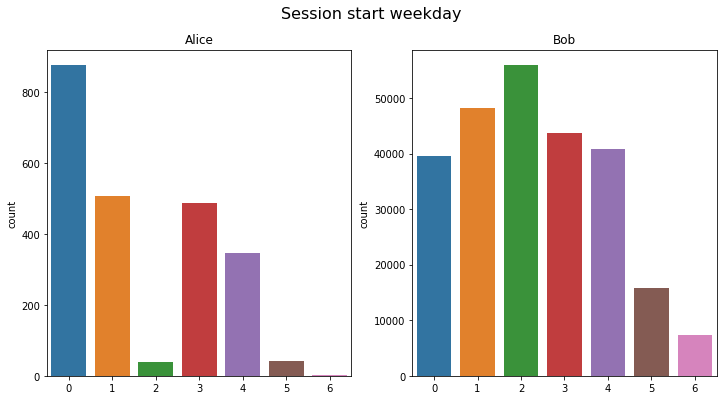

In [14]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
f.suptitle('Session start weekday',fontsize=16)

sns.countplot(session_start_weekday[y==1], ax=ax1).set_title('Alice')
sns.countplot(session_start_weekday[y==0], ax=ax2).set_title('Bob')

plt.show()

# Conclusions for session start weekday
Alice seems to wastly prefer Monday, and she rarely logs on on Wednesday and Saturday, and almost never - on Sunday. Experimenting with different options yielded this binning:
1. Monday, Tuesday
2. Thursday, Friday
3. Wednesday, Saturday, Sunday

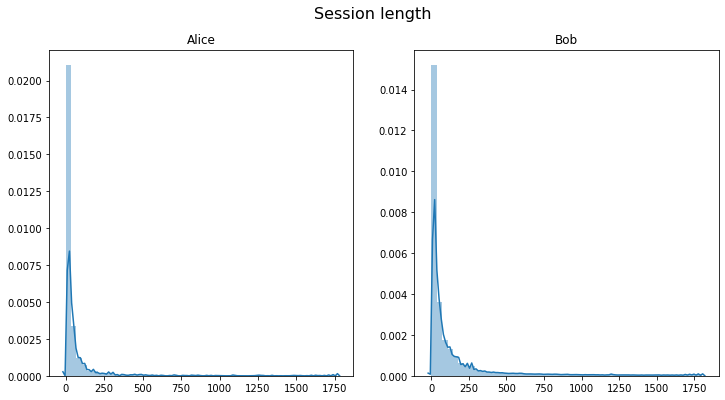

In [15]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
f.suptitle('Session length',fontsize=16)

sns.distplot(session_length[y==1], ax=ax1).set_title('Alice')
sns.distplot(session_length[y==0], ax=ax2).set_title('Bob')

plt.show()

# Conclusions for session length
The figures look alike, but if we look at the y axis, we can see that Alice prefers much shorter sessions.This factor should add tomodel quality.

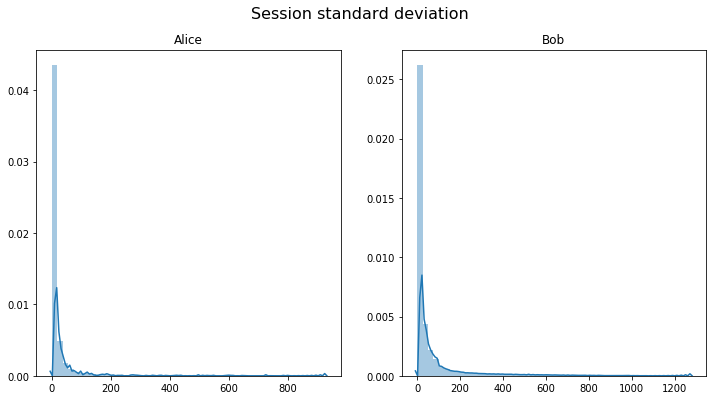

In [16]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
f.suptitle('Session standard deviation',fontsize=16)

sns.distplot(session_len_std[y==1], ax=ax1).set_title('Alice')
sns.distplot(session_len_std[y==0], ax=ax2).set_title('Bob')

plt.show()

# Conclusions for session standard deviation
Alice's sessions have less variance than Bob's, although we'll need to test whether that's a separate effect, or if it's an effect of shorter average length.

# Conclusion
This is enough for visual analysis. Next we'll build a basic bag-of-words model and add the factors we discovered. See `main.ipynb` for details.